In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Order1.csv')
                   

In [4]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
transaction = data.groupby('Member_number')['itemDescription'].apply(list).values.tolist()

In [8]:
te = TransactionEncoder()
te_ary = te.fit_transform(transaction)
df = pd.DataFrame(te_ary,columns=te.columns_)

In [9]:
freq_itemsets = apriori(df,min_support=0.01,use_colnames=True)
print(freq_itemsets.head())

    support                 itemsets
0  0.015393  (Instant food products)
1  0.078502               (UHT-milk)
2  0.031042          (baking powder)
3  0.119548                   (beef)
4  0.079785                (berries)


In [13]:
rules = association_rules(freq_itemsets,metric="confidence",min_threshold=0.50,num_itemsets=1000)
print(rules.head())

       antecedents   consequents  antecedent support  consequent support  \
0       (UHT-milk)  (whole milk)            0.078502            0.458184   
1           (beef)  (whole milk)            0.119548            0.458184   
2   (bottled beer)  (whole milk)            0.158799            0.458184   
3  (bottled water)  (whole milk)            0.213699            0.458184   
4    (brown bread)  (whole milk)            0.135967            0.458184   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.040534    0.516340  1.126928               1.0  0.004565    1.120242   
1  0.064135    0.536481  1.170886               1.0  0.009360    1.168919   
2  0.085428    0.537964  1.174124               1.0  0.012669    1.172672   
3  0.112365    0.525810  1.147597               1.0  0.014452    1.142615   
4  0.069779    0.513208  1.120091               1.0  0.007481    1.113034   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.122227  0.081696  

In [20]:
rules = rules[["antecedents","consequents","support",	"confidence",]]

In [17]:
rules.

,antecedents,consequents,support,confidence
0,(UHT-milk),(whole milk),0.040534,0.516340
1,(beef),(whole milk),0.064135,0.536481
2,(bottled beer),(whole milk),0.085428,0.537964
3,(bottled water),(whole milk),0.112365,0.525810
4,(brown bread),(whole milk),0.069779,0.513208


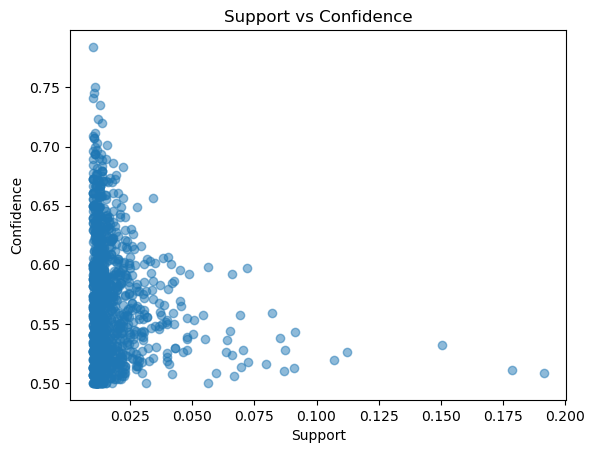

KeyError: 'lift'

In [18]:
# Scatter plot for Support vs. Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Support vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5, color='r')
plt.title('Support vs Lift')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.show()
